In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def select_roi (image):
    fromCenter = False
    showCrosshair = False
    r = cv2.selectROI(image, fromCenter, showCrosshair)
    return r
def crop_image (image, r):
    imCrop = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    return imCrop
def display_image (name , image):
    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
import cv2
from scipy import stats

path = 'C:/Users/Leand/OneDrive/Documentos/Lean/Analizador_imagenes_calcio/Imagenes_confocal/Rata/C071112/'
photo_name = 'c3isack5'
image = cv2.imread(path + photo_name + ".tif",0)    # Read image

In [5]:
display_image(photo_name,image)

In [16]:
r = select_roi (image) # Select ROI
imCrop = crop_image (image, r)    # Crop image
display_image ('Image' , imCrop)    # Display cropped image

In [17]:
umbral=75 #arbitrario
blur = cv2.GaussianBlur(image,(7,7),0)
# img_equalizada = cv2.equalizeHist(blur)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(5,5))
cl1 = clahe.apply(blur)

binaria=(cl1>=umbral)
print(type(binaria[0,0]))
binaria=255*binaria.astype('uint8')
print(type(binaria[0,0]))

<class 'numpy.bool_'>
<class 'numpy.uint8'>


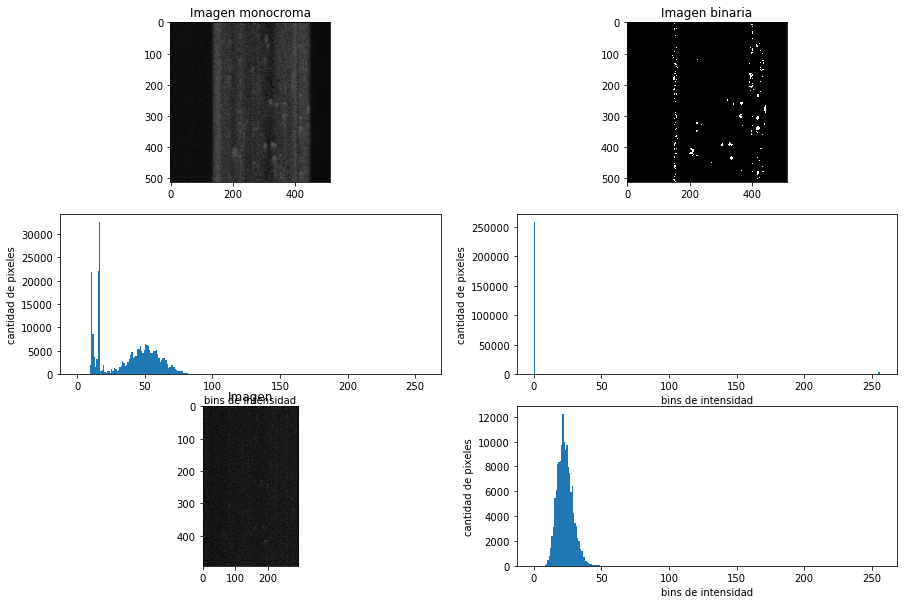

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0].imshow(cl1, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen binaria')
axs[2].hist(cl1[:,:].ravel(), 256,[0,256] ) 
axs[2].set_xlabel('bins de intensidad')
axs[2].set_ylabel('cantidad de pixeles')
axs[3].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')
axs[4].imshow(imCrop, cmap='gray',vmin=0 ,vmax=255)
axs[4].set_title('Imagen')
axs[5].hist(imCrop[:,:].ravel(), 256,[0,256] ) 
axs[5].set_xlabel('bins de intensidad')
axs[5].set_ylabel('cantidad de pixeles')
plt.show()